<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feel free to import other libraries! 

In [2]:
df = pd.read_csv('states_edu.csv')

Chosen test: **<hit `Enter` to edit>**

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [4]:
#renaming columns to make more intuitive
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

In [23]:
#remove all rows wiwthout average readng score for fourth graders
df.dropna(subset=['AVG_READING_4_SCORE'], inplace=True)

In [24]:
#using two different enrolllment columns to fill each other in
((df.ENROLL_ALL - df.ENROLL_ALL_EST)/df.ENROLL_ALL).describe()
df.ENROLL_ALL_EST = df.ENROLL_ALL_EST.fillna(df.ENROLL_ALL)

<h2> Feature Selection </h2>

_Use this space to modify or create features_

In [17]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
306,1998_ALABAMA,ALABAMA,1998,739321.0,4140537.0,374153.0,2589819.0,1176565.0,4245033.0,2218693.0,...,58610.0,57105.0,43957.0,473954.0,205630.0,747980.0,NaN,NaN,211.0,255.0
308,1998_ARIZONA,ARIZONA,1998,794331.0,4675296.0,470398.0,2000801.0,2204097.0,4726098.0,2091741.0,...,67764.0,63943.0,45813.0,543670.0,224867.0,848262.0,NaN,NaN,206.0,260.0
309,1998_ARKANSAS,ARKANSAS,1998,456355.0,2567380.0,226475.0,1505419.0,835486.0,2536027.0,1367612.0,...,35034.0,35936.0,29123.0,282517.0,132507.0,452256.0,NaN,NaN,209.0,256.0
310,1998_CALIFORNIA,CALIFORNIA,1998,5727224.0,39183018.0,3149260.0,22840500.0,13193258.0,38087666.0,20083913.0,...,462241.0,424768.0,334852.0,3666271.0,1627284.0,5926037.0,NaN,NaN,202.0,252.0
311,1998_COLORADO,COLORADO,1998,686360.0,4359021.0,215071.0,1879850.0,2264100.0,4739136.0,2253623.0,...,54382.0,53556.0,40076.0,436825.0,197136.0,699135.0,NaN,NaN,220.0,264.0


In [28]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL_ALL_EST', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'ENROLL_PREK', 'ENROLL_KINDER',
       'ENROLL_4', 'ENROLL_8', 'ENROLL_12', 'ENROLL_PRIMARY', 'ENROLL_HS',
       'ENROLL_ALL', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE',
       'SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT',
       'INSTRUCTIONAL_SERVICES_EXPENDITURE_PER_STUDENT'],
      dtype='object')

In [25]:
# new variable which represents support services expenditure per student
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_ALL']

In [26]:
#new variable for instructonal expenditure per student
df['INSTRUCTIONAL_SERVICES_EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL_ALL']

Final feature list: **<LIST FEATURES HERE\>**

Feature selection justification: **<BRIEFLY DESCRIBE WHY YOU PICKED THESE FEATURES\>**

<h2> EDA </h2>

Visualization 1

Text(0.5, 1.0, 'Distribution of 4th grade reading scores')

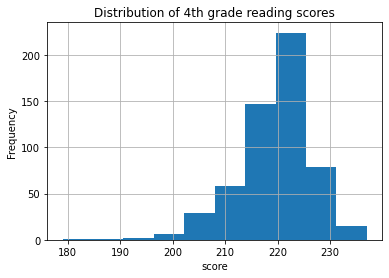

In [29]:
#Histogram of average 4th grade reading scores forcertain years and states
df.AVG_READING_4_SCORE.hist()
plt.xlabel('score')
plt.ylabel('Frequency')
plt.title('Distribution of 4th grade reading scores')

Visualization 2

Text(0.5, 1.0, 'National trend in instructional expenditure over time')

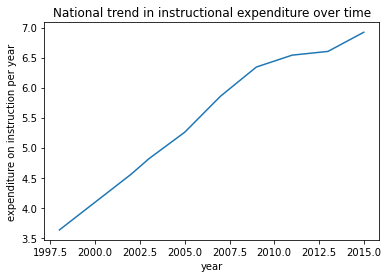

In [45]:
#graph showing average instructional expenditure per student over time
df.groupby('YEAR').INSTRUCTIONAL_SERVICES_EXPENDITURE_PER_STUDENT.mean().plot()
plt.xlabel('year')
plt.ylabel('expenditure on instruction per year')
plt.title('National trend in instructional expenditure over time')

Text(0, 0.5, 'Instructional services by state per student')

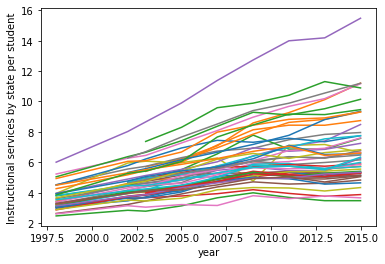

In [44]:
##graph showing average instructional expenditure per student over time by state
df.set_index('YEAR').groupby('STATE').INSTRUCTIONAL_SERVICES_EXPENDITURE_PER_STUDENT.plot()
plt.xlabel('year')
plt.ylabel('Instructional services by state per student')

**<CAPTION FOR VIZ 2>**

Text(0.5, 1.0, '4th grade reading score over time')

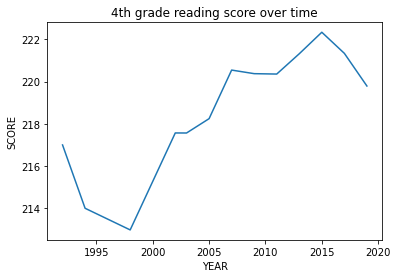

In [42]:
#4th grade reading scores nationally
df.groupby('YEAR').AVG_READING_4_SCORE.mean().plot()
plt.ylabel('SCORE')
plt.title('4th grade reading score over time')

Text(0.5, 1.0, '4th grade reading score over time, by state')

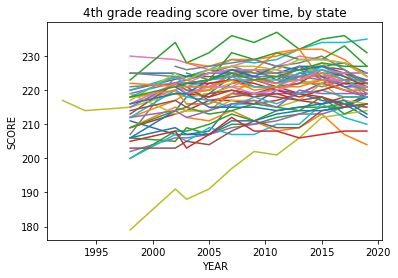

In [43]:
#4th grade reading scores by state
df.set_index('YEAR').groupby('STATE').AVG_READING_4_SCORE.plot()
plt.ylabel('SCORE')
plt.title('4th grade reading score over time, by state')

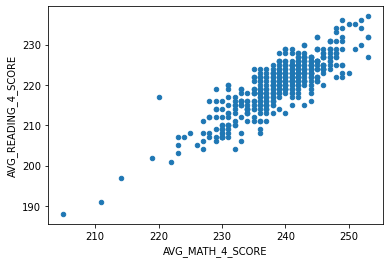

In [51]:
#scatter plot of math vs reading scores in 4th grade
df.plot.scatter(x='AVG_MATH_4_SCORE',y='AVG_READING_4_SCORE')

Text(0, 0.5, '4th grade reading score')

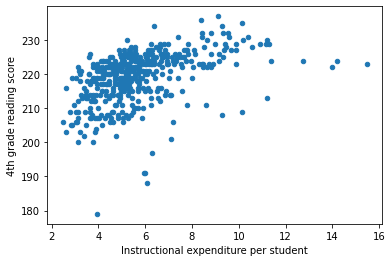

In [53]:
#scater plot of instructional expenditure per student and 4th grade reading scores
df.plot.scatter(x='INSTRUCTIONAL_SERVICES_EXPENDITURE_PER_STUDENT',y='AVG_READING_4_SCORE')
plt.xlabel('Instructional expenditure per student')
plt.ylabel('4th grade reading score')

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [54]:
from sklearn.model_selection import train_test_split

In [61]:
#Loading these in because am curious about correlation between expenditure by student & year and reading score for 4th graders
X = df[['YEAR','ENROLL_4','INSTRUCTIONAL_SERVICES_EXPENDITURE_PER_STUDENT','YEAR']].dropna()
y = df.loc[X.index]['AVG_READING_4_SCORE']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.25, random_state=0)

<h2> Prediction </h2>

Chosen ML task: **<REGRESSION/CLASSIFICATION>**

In [72]:
from sklearn.linear_model import LinearRegression


In [73]:
# create your model here
model = LinearRegression()

In [74]:
model.fit(X_train, y_train)

LinearRegression()

In [75]:
y_pred = model.predict(X_test)

In [76]:
# for classification:
from sklearn.metrics import plot_confusion_matrix

#plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)

Text(0, 0.5, 'Reading Scores for 4th Graders')

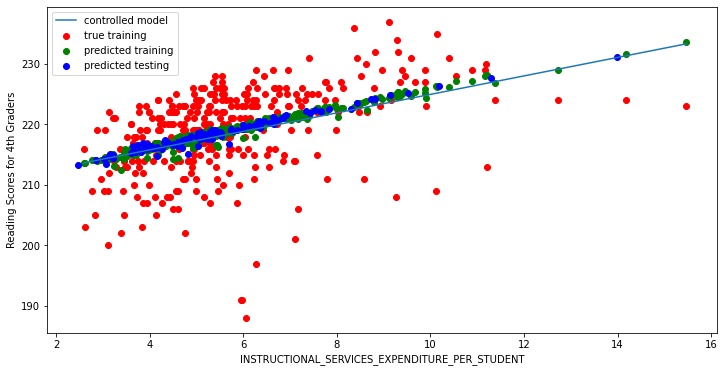

In [78]:
# for regression: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'INSTRUCTIONAL_SERVICES_EXPENDITURE_PER_STUDENT'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Reading Scores for 4th Graders')

<h2> Summary </h2>

For my analysis, I chose to primarily focus on how standardized reading scores of 4th graders are affected by instructional expenditure per student. I first cleaned up the data, by removing all rows that did not provide an average reading score for fourth graders. I then had to create a new variable for instructional expenditure per student by dividing the instructional expenditure by total enrollment. Each data point represents a state in a given year and the relationship between expenditure per student and scores. It appears that for 4th graders, there is a clear positive statistically significant relationship between the amount invested into instruction per capita and the standardized reading scores.